### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         9 non-null      float64
 1   Gender      9 non-null      object 
 2   Salary      9 non-null      float64
 3   Department  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
None


Summary Statistics (Numerical):
              Age         Salary
count    9.000000       9.000000
mean    40.666667   72777.777778
std     30.339743   30503.187447
min     22.000000   50000.000000
25%     27.000000   59000.000000
50%     30.000000   62000.000000
75%     38.000000   72000.000000
max    120.000000  150000.000000


Summary Statistics (Categorical):
       Gender Department
count       9         10
unique      2          3
top      Male         IT
freq        5          4


Null Values (Count):
Age           1
Gender        1
Salary        1
Department    0


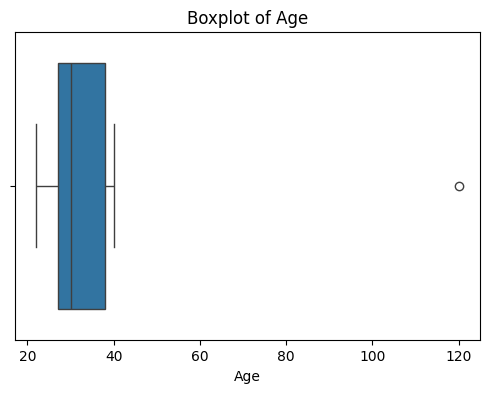

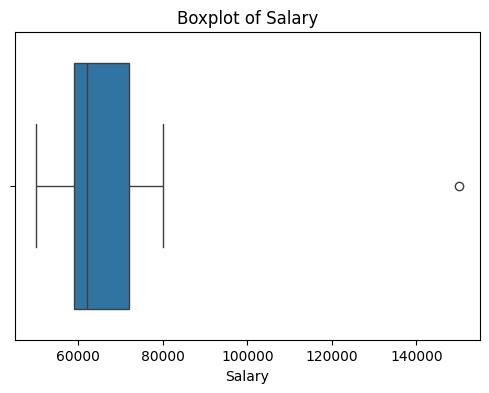

In [1]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a sample dataset manually
data = {
    'Age': [25, 30, 22, 40, 29, np.nan, 120, 35, 38, 27],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', np.nan, 'Male'],
    'Salary': [50000, 60000, 52000, 80000, 62000, 59000, 150000, 70000, 72000, np.nan],
    'Department': ['IT', 'HR', 'IT', 'Finance', 'Finance', 'HR', 'IT', 'HR', 'Finance', 'IT']
}

df = pd.DataFrame(data)

# 2. Basic Information
print("Basic Info:")
print(df.info())
print("\n")

# 3. Basic Statistics
print("Summary Statistics (Numerical):")
print(df.describe())
print("\n")

print("Summary Statistics (Categorical):")
print(df.describe(include='object'))
print("\n")

# 4. Null Values
print("Null Values (Count):")
print(df.isnull().sum())
print("\n")

print("Null Values (Percentage):")
print(df.isnull().mean() * 100)
print("\n")

# 5. Unique Values in Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"Unique values in '{col}' ({df[col].nunique()}):")
    print(df[col].unique())
    print("\n")

# 6. Outlier Detection using Box Plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [2]:
# write your code from here
import pandas as pd
import numpy as np

# 1. Manually create a sample dataset
data = {
    'Age': [25, 30, 17, 40, 29, np.nan, 120, -5, 38, 27],  # -5 and 120 are invalid
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Alien', 'Female', np.nan, 'Male'],  # 'Alien' is invalid
    'Salary': [50000, 60000, 52000, 80000, 62000, 59000, 150000, -1000, 72000, np.nan],  # -1000 is invalid
    'Department': ['IT', 'HR', 'IT', 'Finance', 'Finance', 'HR', 'IT', 'Unknown', 'Finance', 'IT']  # 'Unknown' is invalid
}

df = pd.DataFrame(data)

# 2. Define constraints
constraints = {
    'Age': {
        'type': (int, float),
        'min': 18,
        'max': 100
    },
    'Gender': {
        'type': str,
        'allowed': ['Male', 'Female']
    },
    'Salary': {
        'type': (int, float),
        'min': 0
    },
    'Department': {
        'type': str,
        'allowed': ['IT', 'HR', 'Finance']
    }
}

# 3. Validation logic
def validate_column(column, rules):
    invalid_rows = []
    for i, value in df[column].items():
        # Skip NaN (optional: treat them as invalid if needed)
        if pd.isna(value):
            continue

        # Check type
        if not isinstance(value, rules['type']):
            invalid_rows.append((i, value, 'Invalid type'))
            continue

        # Check allowed values
        if 'allowed' in rules and value not in rules['allowed']:
            invalid_rows.append((i, value, 'Invalid value'))
            continue

        # Check min
        if 'min' in rules and value < rules['min']:
            invalid_rows.append((i, value, f'Below minimum {rules["min"]}'))
            continue

        # Check max
        if 'max' in rules and value > rules['max']:
            invalid_rows.append((i, value, f'Above maximum {rules["max"]}'))
            continue

    return invalid_rows

# 4. Run validation for each column
for col, rule in constraints.items():
    print(f"\nValidating '{col}':")
    issues = validate_column(col, rule)
    if issues:
        for row in issues:
            print(f" - Row {row[0]}: {row[1]} => {row[2]}")
    else:
        print(" - All values are valid.")


Validating 'Age':
 - Row 2: 17.0 => Below minimum 18
 - Row 6: 120.0 => Above maximum 100
 - Row 7: -5.0 => Below minimum 18

Validating 'Gender':
 - Row 6: Alien => Invalid value

Validating 'Salary':
 - Row 7: -1000.0 => Below minimum 0

Validating 'Department':
 - Row 7: Unknown => Invalid value


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

Sample Dataset with Missing Values:

      Name   Age  Gender    Salary Department
0    Alice  25.0  Female   50000.0         IT
1      Bob   NaN    Male   60000.0         HR
2  Charlie  30.0    Male       NaN    Finance
3    David  22.0    None   80000.0         IT
4      Eva  29.0  Female   62000.0       None
5     None   NaN    Male   59000.0         HR
6   George  35.0    Male  150000.0         IT
7   Hannah  40.0    None       NaN    Finance
8      Ian   NaN  Female   72000.0    Finance
9     Jane  27.0  Female   65000.0       None


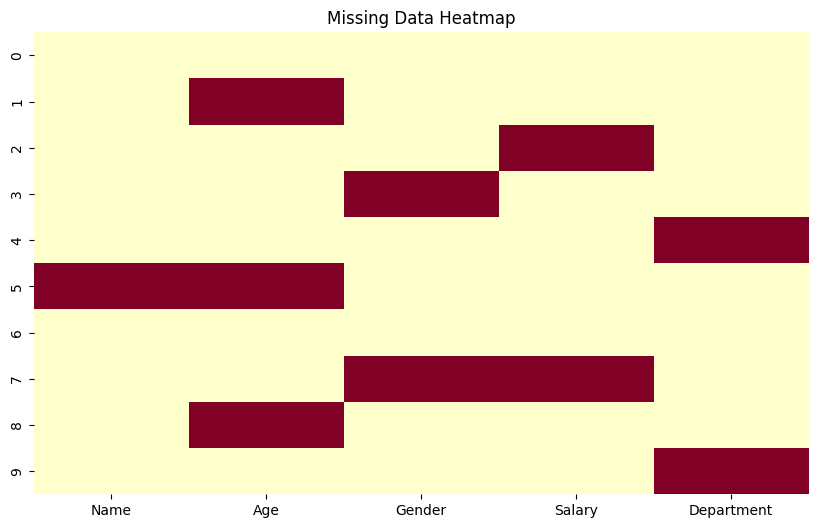


Missing Values Count per Column:
Name          1
Age           3
Gender        2
Salary        2
Department    2
dtype: int64

Rows with at least one missing value:
      Name   Age  Gender   Salary Department
1      Bob   NaN    Male  60000.0         HR
2  Charlie  30.0    Male      NaN    Finance
3    David  22.0    None  80000.0         IT
4      Eva  29.0  Female  62000.0       None
5     None   NaN    Male  59000.0         HR
7   Hannah  40.0    None      NaN    Finance
8      Ian   NaN  Female  72000.0    Finance
9     Jane  27.0  Female  65000.0       None

Rows with more than one missing value:
     Name   Age Gender   Salary Department
5    None   NaN   Male  59000.0         HR
7  Hannah  40.0   None      NaN    Finance


In [3]:
# write your code from here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', None, 'George', 'Hannah', 'Ian', 'Jane'],
    'Age': [25, np.nan, 30, 22, 29, np.nan, 35, 40, np.nan, 27],
    'Gender': ['Female', 'Male', 'Male', None, 'Female', 'Male', 'Male', None, 'Female', 'Female'],
    'Salary': [50000, 60000, None, 80000, 62000, 59000, 150000, None, 72000, 65000],
    'Department': ['IT', 'HR', 'Finance', 'IT', None, 'HR', 'IT', 'Finance', 'Finance', None]
}

df = pd.DataFrame(data)

# 2. Display the DataFrame
print("Sample Dataset with Missing Values:\n")
print(df)

# 3. Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='YlOrRd', cbar=False, yticklabels=True)
plt.title('Missing Data Heatmap')
plt.show()

# 4. Identify missing data patterns
print("\nMissing Values Count per Column:")
print(df.isnull().sum())

print("\nRows with at least one missing value:")
print(df[df.isnull().any(axis=1)])

print("\nRows with more than one missing value:")
print(df[df.isnull().sum(axis=1) > 1])

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [4]:
# write your code from here

import pandas as pd
import numpy as np
import great_expectations as ge

# 1. Create sample dataset with some quality issues
data = {
    'Age': [25, 30, 17, 40, np.nan, 105, 35, -2, 38, 27],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Alien', 'Female', np.nan, 'Male'],
    'Salary': [50000, 60000, 52000, 80000, 62000, 59000, 150000, -1000, 72000, np.nan]
}

df = pd.DataFrame(data)

# 2. Convert to Great Expectations DataFrame
gdf = ge.from_pandas(df)

# 3. Automated data quality checks
results = {}

# Age expectations
results['age_not_null'] = gdf.expect_column_values_to_not_be_null('Age')
results['age_in_range'] = gdf.expect_column_values_to_be_between('Age', min_value=18, max_value=100)

# Gender expectations
results['gender_values'] = gdf.expect_column_values_to_be_in_set('Gender', ['Male', 'Female'])

# Salary expectations
results['salary_positive'] = gdf.expect_column_values_to_be_between('Salary', min_value=0)

# 4. Print Results
print("\n🧪 Data Quality Check Results:\n")
for check, result in results.items():
    print(f"{check}: {'✅ Passed' if result.success else '❌ Failed'}")
    if not result.success:
        print(f"  Unexpected values: {result.result.get('unexpected_list', [])}")

AttributeError: module 'great_expectations' has no attribute 'from_pandas'